# Examen Final

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve

## Data

In [506]:
data = {
    "Texto": [
        "Me llama en la noche, siempre con fuego y pasión", 
        "Camino en la noche con fuerza, pasión y fuego",
        "Siento el fuego y la pasión cada noche", 
        "La noche es nuestra, encendemos la pasión y el fuego",
        "En la noche, tu cuerpo y el mío sienten la pasión y el fuego",
        "La música suena en la noche y el perreo sigue con fuego",
        "El ritmo y el fuego nos encienden en la pista en la noche",
        "Quiero toda tu pasión, fuego y amor en la noche",
        "Otra noche de pasión y fuego bajo las estrellas", 
        "Por ti, la noche arde con pasión, amor y fuego",
        "Dime qué deseas y cumpliré tu pasión en la noche con fuego",
        "A solas en la noche, con pasión, amor y sin miedo", 
        "Bailamos en la playa, riendo y celebrando la vida",
        "Tu amor es un océano que me envuelve con calma", 
        "El ritmo nos mueve bajo el sol y la luna",
        "Celebramos juntas, riendo y compartiendo la noche",
        "Libre y feliz, ahora todo es diferente", 
        "Mis promesas son sinceras y llenas de amor",
        "Nuestro secreto es un juego inocente", 
        "Culpables de este amor, sin preocupaciones",
        "Navegamos hacia nuevos comienzos, con esperanza",
        "Somos leyendas, bailando bajo las estrellas",
        "Tu sonrisa es mi paz y mi alegría",
        "Por amarte, me declaro culpable y feliz",
        "Te espero, sin prisa y con amor verdadero",
        "Risas y sueños, sin lágrimas ni miedo",
        "Tu voz resuena en mi corazón con amor",
        "Te quiero conmigo, sin mentiras ni dudas",
        "Tus besos son mi refugio y mi felicidad",
        "Cuando te vea, seremos felices, sin preocupaciones"
    ],
    "Sentimiento": [
        "Sensible", "Sensible", "Sensible", "Sensible", "Sensible", "Sensible", "Sensible", 
        "Sensible", "Sensible", "Sensible", "Sensible", "Sensible", "No Sensible", 
        "No Sensible", "No Sensible", "No Sensible", "No Sensible", "No Sensible", 
        "No Sensible", "No Sensible", "No Sensible", "No Sensible", "No Sensible",
        "No Sensible", "No Sensible", "No Sensible", "No Sensible", "No Sensible",
        "No Sensible", "No Sensible"
    ],
    "Conjunto de Datos": [
        "Training", "Training", "Training", "Training", "Training", "Training", "Training",
        "Training", "Training", "Testing", "Testing", "Testing", "Training", 
        "Training", "Training", "Training", "Training", "Training", 
        "Training", "Training", "Training", "Training", "Training",
        "Training", "Training", "Training", "Training", "Testing",
        "Testing", "Testing"
    ]
}
df = pd.DataFrame(data)
df['Sensible_binario'] = df['Sentimiento'].map({'Sensible': 1, 'No Sensible': 0})
df['Texto_procesado'] = df['Texto'].str.replace(',', '').str.lower()

conectores = [
    "y", "la", "en", "con", "el", "tu", "de", "mi", "es", "sin", "me", "te",
    "nos", "los", "las", "por"
]

# Eliminar los conectores de los textos procesados
#Se probo usando y sin usar conectores, se decide dejar conectores
df['Texto_procesado'] = df['Texto_procesado'].apply(
    lambda texto: ' '.join([palabra for palabra in texto.split() if palabra not in conectores])
)

## Embedings

In [507]:
embeddings = {
    "noche": 0.6, "fuego": 0.5, "pasión": 0.7, "amor": 0.8, "bajo": 0.0605,
    "estrellas": 0.0812, "feliz": 0.0670, "miedo": -0.5, "preocupaciones": -0.0301,
    "quiero": -0.0030, "riendo": 0.0607, "ritmo": -0.0696, "alegría": 0.7,
    "amarte": 0.0174, "arde": 0.0299, "bailamos": 0.0028, "bailando": -0.0054,
    "besos": -0.0632, "cada": 0.0466, "calma": 0.0604, "camino": -0.0149,
    "celebramos": -0.0046, "celebrando": 0.0992, "comienzos": -0.0591,
    "compartiendo": 0.0572, "conmigo": -0.0656, "corazón": -0.0604, "cuerpo": 0.0353,
    "culpable": 0.0652, "culpables": -0.0874, "cumpliré": 0.0986, "declaro": -0.0877,
    "deseas": -0.0490, "diferente": -0.0875, "dime": 0.0361, "dudas": -0.0341,
    "encendemos": 0.0692, "encienden": -0.0514, "envuelve": 0.0883, "esperanza": -0.0964,
    "espero": 0.0842, "felices": -0.0857, "felicidad": 0.8, "fuerza": -0.0976,
    "hacia": -0.0755, "inocente": 0.0659, "juego": -0.0396, "juntas": 0.0367,
    "leyendas": 0.0521, "libre": -0.0284, "llama": 0.0684, "llenas": -0.0058,
    "luna": 0.0793, "lágrimas": -0.0169, "mentiras": -0.0728, "mis": 0.0939,
    "mueve": 0.0642, "mío": -0.0557, "música": 0.4, "navegamos": -0.0959,
    "nuestra": 0.0710, "nuestro": 0.0915, "nuevos": 0.0766, "océano": -0.0801,
    "otra": -0.0365, "paz": 0.0429, "perreo": -0.8, "pista": 0.0370, "playa": -0.0685,
    "prisa": -0.0154, "promesas": -0.0041, "qué": -0.0792, "refugio": 0.0798,
    "resuena": -0.0907, "risas": -0.0950, "secreto": -0.0375, "seremos": 0.0266,
    "siempre": 0.0846, "sienten": 0.0921, "siento": 0.0951, "sigue": 0.0867,
    "sinceras": 0.0681, "sol": 0.0573, "solas": -0.0382, "somos": -0.0621,
    "sonrisa": -0.0902, "suena": -0.0510, "sueños": 0.5, "ti": 0.0508,
    "toda": -0.0515, "todo": -0.0381, "tus": 0.0558, "vea": 0.0369, "verdadero": 0.0445,
    "vida": -0.0654, "voz": -0.0637
}

## Exploración de datos

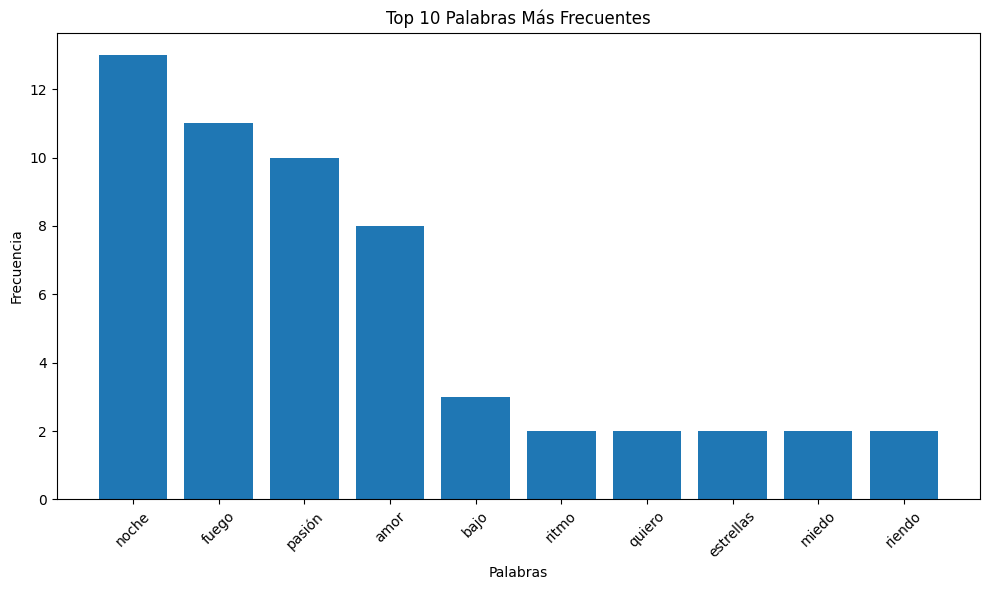

,Palabra,Corr sensibilidad
0,noche,0.933700
1,fuego,0.931891
2,pasión,0.866025
8,miedo,0.054554
6,quiero,0.054554
5,ritmo,0.054554
7,estrellas,0.054554
3,amor,-0.030773
4,bajo,-0.045361
9,riendo,-0.218218


In [508]:
all_words = " ".join(df['Texto_procesado']).split()

word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top 10 Palabras Más Frecuentes")
plt.ylabel("Frecuencia")
plt.xlabel("Palabras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

word_matrix = pd.DataFrame(
    {word: df['Texto_procesado'].str.contains(word).astype(int) for word, _ in top_words}
)

correlation = word_matrix.corrwith(df['Sensible_binario'])

correlation_df = pd.DataFrame({
    "Palabra": words,
    "Corr sensibilidad": correlation.values
}).sort_values(by="Corr sensibilidad", ascending=False)

correlation_df


## Creación de la matriz TF-IDF

### generar train y testing

In [509]:
dfTrain = df[df['Conjunto de Datos'] == 'Training'].reset_index(drop=True)
dfTest = df[df['Conjunto de Datos'] == 'Testing'].reset_index(drop=True)

In [510]:
def calculate_embedding_matrix(text, embedding_vocab):
    words = text.split()
    row = {word: embeddings.get(word, 0) if word in words else 0 for word in embedding_vocab}
    return row

embedding_vocab = list(embeddings.keys())

embedding_matrix = dfTrain['Texto_procesado'].apply(lambda text: calculate_embedding_matrix(text, embedding_vocab))
embedding_df = pd.DataFrame(list(embedding_matrix)).fillna(0)

embedding_df = embedding_df[embedding_vocab]

embedding_matrix = dfTest['Texto_procesado'].apply(lambda text: calculate_embedding_matrix(text, embedding_vocab))
embedding_df_test = pd.DataFrame(list(embedding_matrix)).fillna(0)

embedding_df_test = embedding_df_test[embedding_vocab]

embedding_df



,noche,fuego,pasión,amor,bajo,estrellas,feliz,miedo,preocupaciones,quiero,...,suena,sueños,ti,toda,todo,tus,vea,verdadero,vida,voz
0,0.6,0.5,0.7,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
1,0.6,0.5,0.7,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
2,0.6,0.5,0.7,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
3,0.6,0.5,0.7,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
4,0.6,0.5,0.7,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
5,0.6,0.5,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,-0.051,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
6,0.6,0.5,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
7,0.6,0.5,0.7,0.8,0.0000,0.0000,0.000,0.0,0.0000,-0.003,...,0.000,0.0,0,-0.0515,0.0000,0,0,0.0000,0.0000,0.0000
8,0.6,0.5,0.7,0.0,0.0605,0.0812,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000
9,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0000,0.000,...,0.000,0.0,0,0.0000,0.0000,0,0,0.0000,-0.0654,0.0000


In [511]:
vectorizer = TfidfVectorizer()
tfidf_matrix_train = vectorizer.fit_transform(dfTrain['Texto_procesado'])

tfidf_matrix_test = vectorizer.transform(dfTest['Texto_procesado'])


tfidf_df_train = pd.DataFrame(
    tfidf_matrix_train.toarray(), columns=vectorizer.get_feature_names_out()
)
tfidf_df_test = pd.DataFrame(
    tfidf_matrix_test.toarray(), columns=vectorizer.get_feature_names_out()
)

column_order = tfidf_df_train.sum(axis=0).sort_values(ascending=False).index
tfidf_df_train = tfidf_df_train[column_order]
tfidf_df_train

,noche,fuego,pasión,amor,bajo,ritmo,estrellas,feliz,riendo,un,...,nuevos,calma,que,envuelve,océano,mis,llenas,promesas,son,sinceras
0,0.301713,0.317505,0.354477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.301713,0.317505,0.354477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.301713,0.317505,0.354477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.301713,0.317505,0.354477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.260519,0.274154,0.306079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.241808,0.254464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.282380,0.297159,0.000000,0.000000,0.000000,0.483859,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.282354,0.297132,0.331732,0.352437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.281804,0.296554,0.331086,0.000000,0.438354,0.000000,0.482874,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404652,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Implementación de gradiente descendente

In [512]:
def train_logistic_regression_with_gradient_descent(X, y, learning_rate=0.4, batch_size=2, iterations=50):
    """
    Entrena un modelo de regresión logística usando gradiente descendiente.

    Args:
        X (numpy.ndarray): Matriz de características.
        y (numpy.ndarray): Vector objetivo (binario).
        learning_rate (float): Tasa de aprendizaje.
        batch_size (int): Tamaño del lote.
        iterations (int): Número de iteraciones.

    Returns:
        pd.DataFrame: DataFrame con los coeficientes y el error por iteración.
    """
    n_samples, n_features = X.shape
    b = np.zeros(n_features + 1)  # Incluyendo el intercepto

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    results = []

    for iter in range(iterations):
        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            logits = np.dot(X_batch, b[1:]) + b[0]

            preds = sigmoid(logits)

            gradient = np.dot(X_batch.T, (preds - y_batch)) / batch_size
            gradient_intercept = np.sum(preds - y_batch) / batch_size

            b[1:] -= learning_rate * gradient
            b[0] -= learning_rate * gradient_intercept

        logits_all = np.dot(X, b[1:]) + b[0]
        preds_all = sigmoid(logits_all)
        error = -np.mean(y * np.log(preds_all) + (1 - y) * np.log(1 - preds_all))

        # Guardar resultados de la iteración
        results.append({
            'iteracion': iter + 1,
            'b': b.copy(),
            'error': error
        })

    resultados_df = pd.DataFrame({
        'Iteración': [res['iteracion'] for res in results],
        'b0 (Intercepto)': [res['b'][0] for res in results],
        'Error': [res['error'] for res in results],
        **{f'b{i} (Palabra {i})': [res['b'][i] for res in results] for i in range(1, n_features + 1)}
    })

    return resultados_df



### Con matriz TF-IDF

In [513]:
X = tfidf_df_train.values
y = dfTrain['Sensible_binario'].values
mV1_0 = train_logistic_regression_with_gradient_descent(X, y)

tabla_simplificada = mV1_0[['Iteración', 'b0 (Intercepto)', 'b1 (Palabra 1)', 'b2 (Palabra 2)', 'b3 (Palabra 3)']]

tabla_simplificada.head(10)

,Iteración,b0 (Intercepto),b1 (Palabra 1),b2 (Palabra 2),b3 (Palabra 3)
0,1,-0.757384,0.177351,0.218523,0.198377
1,2,-0.970852,0.416549,0.495019,0.447538
2,3,-1.048060,0.652167,0.764750,0.688315
3,4,-1.091416,0.869690,1.013564,0.908038
4,5,-1.126585,1.067541,1.240181,1.105842
5,6,-1.159750,1.247353,1.446512,1.283825
6,7,-1.192191,1.411337,1.635031,1.444586
7,8,-1.224029,1.561588,1.808065,1.590544
8,9,-1.255167,1.699925,1.967635,1.723788
9,10,-1.285502,1.827888,2.115457,1.846074


### Con embedings

In [514]:
X_emb = embedding_df.values
y_emb = dfTrain['Sensible_binario'].values

mV2_0 = train_logistic_regression_with_gradient_descent(X_emb, y_emb)

### Coeficientes de los modelos

#### Modelo 1

In [515]:
mV1_0.head(1)

,Iteración,b0 (Intercepto),Error,b1 (Palabra 1),b2 (Palabra 2),b3 (Palabra 3),b4 (Palabra 4),b5 (Palabra 5),b6 (Palabra 6),b7 (Palabra 7),...,b76 (Palabra 76),b77 (Palabra 77),b78 (Palabra 78),b79 (Palabra 79),b80 (Palabra 80),b81 (Palabra 81),b82 (Palabra 82),b83 (Palabra 83),b84 (Palabra 84),b85 (Palabra 85)
0,1,-0.757384,0.594637,0.177351,0.218523,0.198377,-0.124812,-0.055807,-0.020816,-0.006799,...,-0.042312,-0.056669,-0.056669,-0.056669,-0.056669,-0.045065,-0.045065,-0.045065,-0.045065,-0.045065


#### Modelo 2

In [516]:
mV2_0.head(1)

,Iteración,b0 (Intercepto),Error,b1 (Palabra 1),b2 (Palabra 2),b3 (Palabra 3),b4 (Palabra 4),b5 (Palabra 5),b6 (Palabra 6),b7 (Palabra 7),...,b87 (Palabra 87),b88 (Palabra 88),b89 (Palabra 89),b90 (Palabra 90),b91 (Palabra 91),b92 (Palabra 92),b93 (Palabra 93),b94 (Palabra 94),b95 (Palabra 95),b96 (Palabra 96)
0,1,-0.780418,0.531914,0.318705,0.328048,0.365414,-0.3089,-0.009861,-0.003023,-0.012636,...,-0.003667,-0.034242,0.0,-0.002763,0.004328,0.0,0.0,-0.003001,0.008476,0.003784


## Evaluacion de modelo

In [517]:
X_train_tfidf = tfidf_df_train.values
y_train_tfidf = dfTrain['Sensible_binario'].values
X_test_tfidf = tfidf_df_test.values
y_test_tfidf = dfTest['Sensible_binario'].values

Calculo con funcion manual para modelo 1

In [518]:
final_b = mV1_0.iloc[-1].filter(like='b').values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

logits_tfidf = np.dot(X_test_tfidf, final_b[1:]) + final_b[0]
preds_tfidf = sigmoid(logits_tfidf)

y_pred_tfidf = (preds_tfidf >= 0.5).astype(int)

precision_tfidf = precision_score(y_test_tfidf, y_pred_tfidf)
recall_tfidf = recall_score(y_test_tfidf, y_pred_tfidf)
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)

print("Resultados con modelo TF-IDF:")
print(f"Precisión: {precision_tfidf}")
print(f"Recall: {recall_tfidf}")
print(f"F1 Score: {f1_tfidf}")
print("Matriz de Confusión:")
print(conf_matrix_tfidf)

Resultados con modelo TF-IDF:
Precisión: 0.0
Recall: 0.0
F1 Score: 0.0
Matriz de Confusión:
[[3 0]
 [3 0]]


e:\Informacion\Downloads\taller\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [519]:
model_tfidf = LogisticRegression(max_iter=1000, solver='lbfgs')
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
preds_tfidf = model_tfidf.predict_proba(X_test_tfidf)[:, 1]

y_pred_tfidf = (preds_tfidf >= 0.5).astype(int)
precision_tfidf = precision_score(y_test_tfidf, y_pred_tfidf)
recall_tfidf = recall_score(y_test_tfidf, y_pred_tfidf)
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)


# Evaluación del modelo con Embeddings
X_test_emb = embedding_df_test.values
y_test_emb = dfTest['Sensible_binario'].values

# Recuperar los coeficientes finales del modelo mV2_0
b_emb = mV2_0.iloc[-1].filter(like='b').values

logits_emb = np.dot(X_test_emb, b_emb[1:]) + b_emb[0]
preds_emb = 1 / (1 + np.exp(-logits_emb))  # Sigmoid

y_pred_emb = (preds_emb >= 0.5).astype(int)
precision_emb = precision_score(y_test_emb, y_pred_emb)
recall_emb = recall_score(y_test_emb, y_pred_emb)
f1_emb = f1_score(y_test_emb, y_pred_emb)
conf_matrix_emb = confusion_matrix(y_test_emb, y_pred_emb)

resultados = {
    "Modelo TF-IDF": {
        "Precision": precision_tfidf,
        "Recall": recall_tfidf,
        "F1 Score": f1_tfidf,
        "Matriz de Confusion": conf_matrix_tfidf.tolist()
    },
    "Modelo Embeddings": {
        "Precision": precision_emb,
        "Recall": recall_emb,
        "F1 Score": f1_emb,
        "Matriz de Confusion": conf_matrix_emb.tolist()
    }
}

resultados_df = pd.DataFrame(resultados)
resultados_df

e:\Informacion\Downloads\taller\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo TF-IDF,Modelo Embeddings
Precision,0.0,1.0
Recall,0.0,1.0
F1 Score,0.0,1.0
Matriz de Confusion,"[[3, 0], [3, 0]]","[[3, 0], [0, 3]]"


In [520]:
def plot_gain_chart(y_true, preds, label):
    fpr, tpr, _ = roc_curve(y_true, preds)
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.xlabel("Proporción de muestras analizadas (FPR)")
    plt.ylabel("Proporción de contenido sensible detectado (TPR)")
    plt.title("Gain Chart")

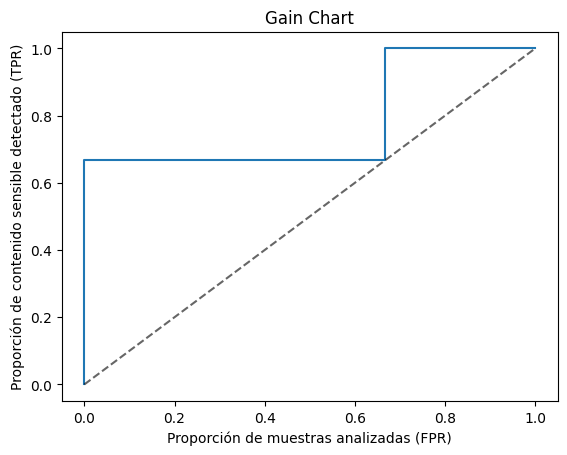

In [521]:
plot_gain_chart(y_test_tfidf, preds_tfidf, "Modelo TF-IDF (mV1_0)")

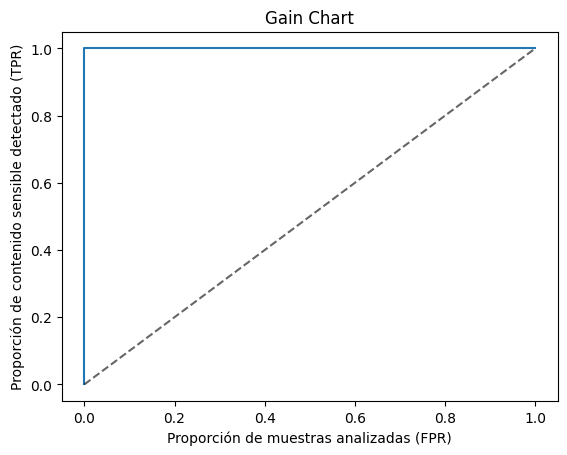

In [522]:
plot_gain_chart(y_test_emb, preds_emb, "Modelo Embeddings (mV2_0)")

In [523]:
model = LogisticRegression()
model.fit(X, y)

coefficients = model.coef_[0]
words = tfidf_df_train.columns

coef_df = pd.DataFrame({
    "Palabra": words,
    "Coeficiente": coefficients
}).sort_values(by="Coeficiente", ascending=False)

coef_df


,Palabra,Coeficiente
1,fuego,1.128247
0,noche,0.997491
2,pasión,0.969209
22,encienden,0.257213
21,pista,0.257213
...,...,...
19,paz,-0.145760
9,un,-0.192412
7,feliz,-0.210868
8,riendo,-0.226735
